## 1. 머신 러닝 (50점)
데이터 설명 : 신용카드 사기 탐지를 위한 예제 데이터이다.

In [51]:
# 1. Time : 트랜잭션 시간, 의미 없음  
# 2. V1~V28 :사용자 ID 및 민감한 기능(v1-v28)을 보호하기 위해 변환된 정보 
# 3. Amount : 거래금액 
# 4. Class : 0은 정상, 1은 이상치(신용카드 사기) 

In [52]:
import pandas as pd
raw_df = pd.read_csv("./../data/27_problem1.csv")
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [53]:
df = raw_df.copy()

In [54]:
# 1. 데이터 전처리

In [55]:
# 1-1. 데이터의 특징을 파악하시오(EDA)
v_cols = [col for col in df.columns if col.startswith("V")]
target_col = "Class"

In [56]:
# General EDA

In [57]:
'''
결측치는 존재하지 않으며, 모두 숫자형 데이터이다.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


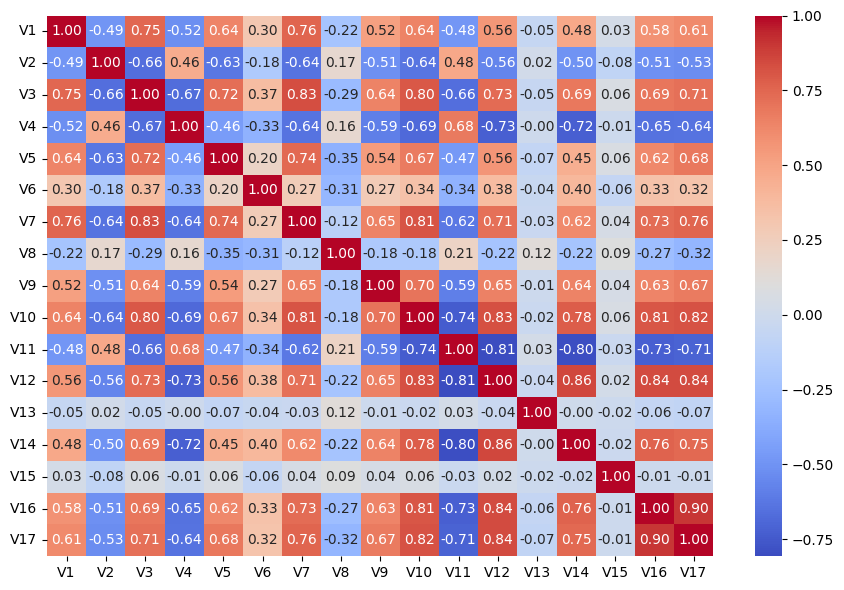

In [58]:
'''
V1~V17까지의 데이터는 모두 익명화된 데이터이기 때문에 어떤 데이터인지 알 수 없다.
다만, 데이터들의 상관계수를 살펴 볼때 강한 상관관계가 있는 feature들이 존재함을 파악할 수 있다.
-> 이후 차원축소를 진행하는 것이 좋을 것 같다.
'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.heatmap(df.loc[:, v_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

In [59]:
'''
target 데이터 분포를 살펴보면, 0과 1의 분포가 매우 불균형하다.
이후 모델 학습시, 적절한 샘플링 방법을 통해 불균형을 해소해야 할 것 같다.
'''
df['Class'].value_counts()

Class
0    993
1    200
Name: count, dtype: int64

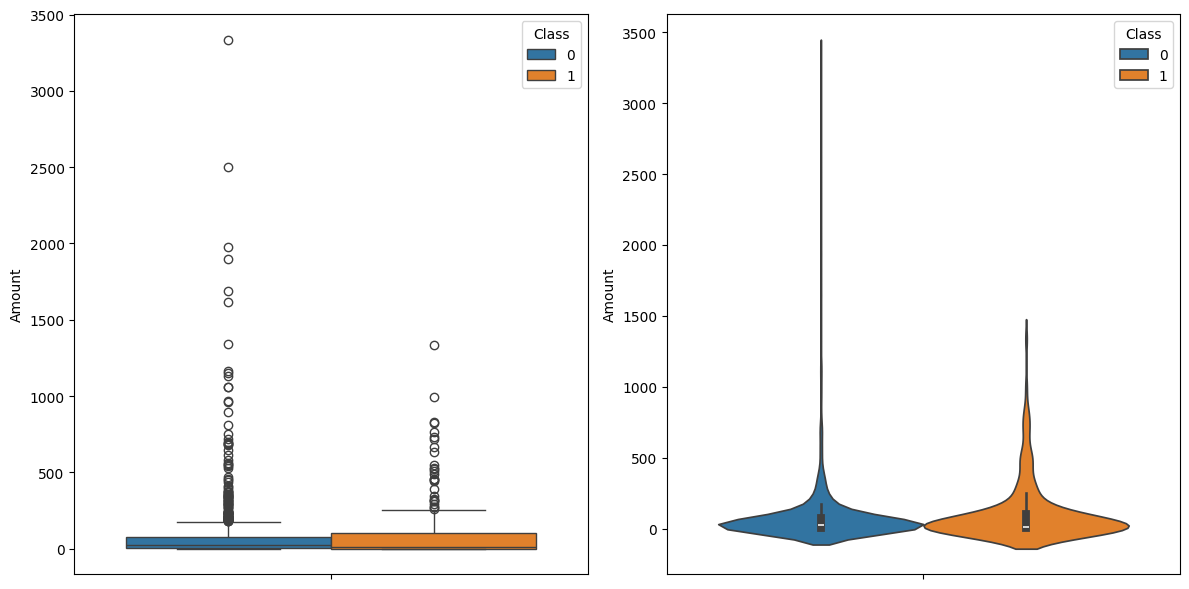

In [60]:
'''
Amount의 경우 0~1000 사이의 값이 대부분을 차지하고 있으며, 이상치가 존재함을 확인할 수 있다.
이후 이상치를 제거하거나 변환하는 전처리가 필요할 것 같다.
'''
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, y='Amount', hue='Class', ax=axes[0])
sns.violinplot(data=df, y='Amount', hue='Class', ax=axes[1])
plt.tight_layout()
plt.show()

In [61]:
# 1-2. 상관관계를 시각화하고 전처리가 필요함을 설명하시오.

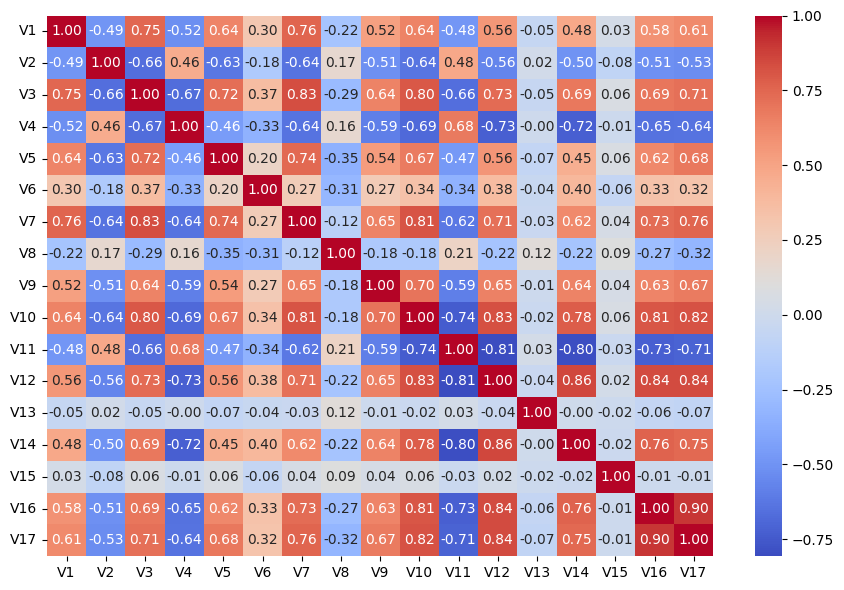

In [62]:
'''
V1~V17까지의 데이터는 모두 익명화된 데이터이기 때문에 어떤 데이터인지 알 수 없다.
다만, 데이터들의 상관계수를 살펴 볼때 강한 상관관계가 있는 feature들이 존재함을 파악할 수 있다.
-> 이후 차원축소를 진행하는 것이 좋을 것 같다.
'''
plt.figure(figsize=(9, 6))
sns.heatmap(df.loc[:, v_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

In [63]:
# 2. 차원축소

In [64]:
# 2-1. 차원 축소 방법 2가지 이상을 비교하고 한 가지를 선택하시오.
'''
1. PCA(Principal Component Analysis)
    : 데이터의 분산을 최대한 보존하는 새로운 축을 찾아 차원을 축소하는 방법
    : 데이터의 분산을 최대한 보존하기 때문에, 데이터의 정보 손실이 적다.

2. T-SNE(T-distributed Stochastic Neighbor Embedding)
    : 고차원 데이터를 저차원 공간으로 변환하는 비선형 차원축소 기법
    : 데이터의 군집을 시각화하기에 적합하다.

이번 경우에는 데이터의 분산을 최대한 보존하는 PCA를 사용하는 것이 적합할 것 같다.
'''

'\n1. PCA(Principal Component Analysis)\n    : 데이터의 분산을 최대한 보존하는 새로운 축을 찾아 차원을 축소하는 방법\n    : 데이터의 분산을 최대한 보존하기 때문에, 데이터의 정보 손실이 적다.\n\n2. T-SNE(T-distributed Stochastic Neighbor Embedding)\n    : 고차원 데이터를 저차원 공간으로 변환하는 비선형 차원축소 기법\n    : 데이터의 군집을 시각화하기에 적합하다.\n\n이번 경우에는 데이터의 분산을 최대한 보존하는 PCA를 사용하는 것이 적합할 것 같다.\n'

In [65]:
# 2-2. 위에서 선택한 방법을 실제로 수행하고, 선택한 이유를 설명하시오.

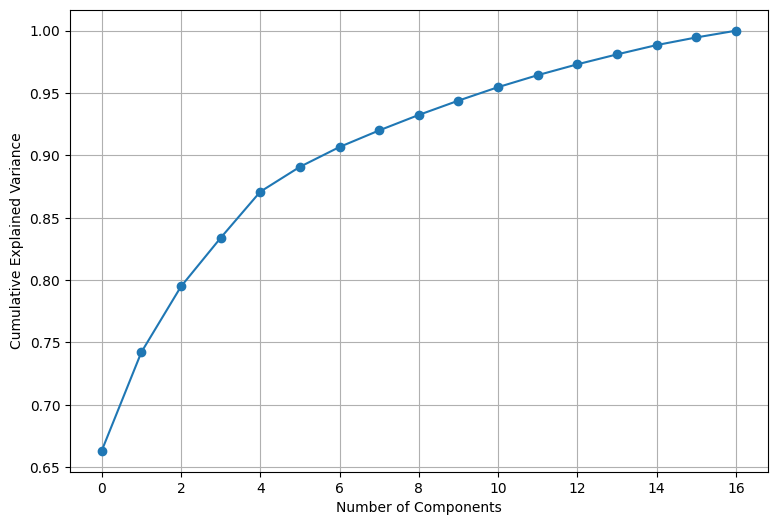

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df.loc[:, v_cols])


cumsum_var_ratio = pca.explained_variance_ratio_.cumsum() 
plt.figure(figsize=(9, 6))
plt.plot(cumsum_var_ratio, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [67]:
'''
이번 pca의 경우 전체 분산의 90%를 설명하는 방향으로 차원을 축소하는 것이 적합할 것 같다.
전체 분산의 90% 설명을 위해서는 6개의 주성분을 사용하면 된다.
'''
pca = PCA(n_components=6)

df = pd.concat([
    df.drop(v_cols, axis=1),
    pd.DataFrame(pca.fit_transform(df.loc[:, v_cols]), columns=[f"pca_{i}" for i in range(1, 7)])
], axis=1)

In [ ]:
# 3. 오버 샘플링과 언더 샘플링

In [69]:
len(df)

1193

In [70]:
df['Class'].value_counts()

Class
0    993
1    200
Name: count, dtype: int64

In [ ]:
# 3-1. 오버 샘플링과 언더 샘플링의 장단점을 비교하고 선택하시오.
'''
오버 샘플링은 소수 클래스의 데이터를 증가시켜 데이터의 불균형을 해소하는 방법이다.
    : 장점
        1. 소수 클래스의 데이터를 증가시킴으로써 데이터의 불균형을 해소할 수 있다.
        2. 학습 데이터 셋이 부족하다면 오버 샘플링을 통해 데이터 증강이 가능하다.
    : 단점
        1. 과적합의 위험이 존재한다.
        2. 데이터 증강 과정에서 적절하지 못한 데이터가 생성될 수 있다.

언더 샘플링은 다수 클래스의 데이터를 감소시켜 데이터의 불균형을 해소하는 방법이다.
    : 장점
        1. 다수 클래스의 데이터를 감소시킴으로써 데이터의 불균형을 해소할 수 있다.
        2. 학습 데이터 셋이 많다면 언더 샘플링을 통해 데이터 감소가 가능하다. (학습 시간 단축)
    : 단점
        1. 정보 손실이 발생할 수 있다. (다수 클래스의 데이터를 제거하기 때문)
        2. 학습 데이터 셋이 적다면 모델 학습을 위한 데이터가 부족해질 수 있다.
이번 데이터의 경우 약 1000개의 학습 데이터가 존재하며, 언더 샘플링을 진행한다면 훨씬 더 적은 데이터로 학습을 진행해야 할 것 같다.
그렇기 때문에 오버 샘플링을 통해 데이터의 불균형을 해소하는 것이 적합할 것 같다.
'''

In [ ]:
# 3-2. 분류분석 구현 및 위에서 선택한 샘플링 기법 중 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정하시오.
'''
오버샘플링 기법
    1. RandomOverSampler
        : 소수 클래스의 데이터를 무작위로 복제하여 데이터의 불균형을 해소하는 방법
    2. SMOTE
        : 소수 클래스의 데이터와 가장 가까운 이웃 데이터 사이에 새로운 데이터를 생성하여 데이터의 불균형을 해소하는 방법
'''

df = df.drop(columns=['Time'])
X = df.drop(columns=['Class'])
y = df['Class']


from imblearn.over_sampling import RandomOverSampler, SMOTE

X_ros, y_ros = RandomOverSampler().fit_resample(X, y)
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [85]:
model_result_dict = dict()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("RandomOverSampler")
print("Train - Accuracy : {:.4f}, Precision : {:.4f}, Recall : {:.4f}, F1 : {:.4f}, AUC : {:.4f}".format(
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred),
    recall_score(y_train, y_train_pred),
    f1_score(y_train, y_train_pred),
    roc_auc_score(y_train, y_train_pred)
))
print("Test - Accuracy : {:.4f}, Precision : {:.4f}, Recall : {:.4f}, F1 : {:.4f}, AUC : {:.4f}".format(
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred),
    recall_score(y_test, y_test_pred),
    f1_score(y_test, y_test_pred),
    roc_auc_score(y_test, y_test_pred)
))
model_result_dict['RandomOverSampler'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1': f1_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_test_pred)
}

RandomOverSampler
Train - Accuracy : 0.9351, Precision : 0.9726, Recall : 0.8952, F1 : 0.9323, AUC : 0.9350
Test - Accuracy : 0.9523, Precision : 0.9892, Recall : 0.9154, F1 : 0.9509, AUC : 0.9526


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("SMOTE")
print("Train - Accuracy : {:.4f}, Precision : {:.4f}, Recall : {:.4f}, F1 : {:.4f}, AUC : {:.4f}".format(
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred),
    recall_score(y_train, y_train_pred),
    f1_score(y_train, y_train_pred),
    roc_auc_score(y_train, y_train_pred)
))
print("Test - Accuracy : {:.4f}, Precision : {:.4f}, Recall : {:.4f}, F1 : {:.4f}, AUC : {:.4f}".format(
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred),
    recall_score(y_test, y_test_pred),
    f1_score(y_test, y_test_pred),
    roc_auc_score(y_test, y_test_pred)
))
model_result_dict['SMOTE'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1': f1_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_test_pred)
}

SMOTE
Train - Accuracy : 0.9477, Precision : 0.9797, Recall : 0.9141, F1 : 0.9458, AUC : 0.9476
Test - Accuracy : 0.9598, Precision : 0.9947, Recall : 0.9254, F1 : 0.9588, AUC : 0.9601


In [ ]:
# 3-3. 현재까지 전처리한 데이터를 통해 분류 모델 수행 후 결과를 분석하시오.
'''
이번 프로젝트의 경우에는 SMOTE가 RandomOverSampler보다 더 좋은 성능을 보여주었다.
이는 SMOTE가 만들어낸 새로운 데이터가 더욱 효과적이었기 때문으로 보인다.
'''
pd.DataFrame(model_result_dict)

,RandomOverSampler,SMOTE
Accuracy,0.952261,0.959799
Precision,0.989247,0.994652
Recall,0.915423,0.925373
F1,0.950904,0.958763
AUC,0.952635,0.960148


In [ ]:
# 4. 이상탐지 모델

In [ ]:
# 4.1 이상탐지 모델 2가지 이상 기술, 장단점을 설명하시오.
'''
이상 탐지 모델은 정상 데이터와 이상 데이터를 구분하는 모델이다.

1. Isolation Forest
    장점 : 
        1. 이상치 탐지에 효과적이다.
        2. 높은 차원의 데이터에도 효과적이다.
        3. 학습 시간이 빠르다.
    단점 :
        1. 데이터의 분포를 가정하지 않기 때문에, 데이터의 분포에 따라 성능이 달라질 수 있다.
        
2. Local Outlier Factor(LOF)
    장점 : 
        1. 밀도 기반 이상치 탐지 방법이기 때문에, 밀도 기반 이상치 탐지에 효과적이다.
        2. 비지도 학습 방법이기 때문에, 레이블이 없는 데이터에도 적용이 가능하다.
    단점 :
        1. 고차원 데이터에 대해서는 성능이 떨어질 수 있다.
'''

In [94]:
# 4.2 앞서 전처리한 데이터로 한 가지 이상의 탐지 모델을 구현하고 3. 에서 만든 모델과 비교하시오.
'''

'''
from sklearn.ensemble import IsolationForest

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_test_pred_lr = lr.predict(X_test_scaled)


IsolationForest_model = IsolationForest()
IsolationForest_model.fit(X_train_scaled)
y_test_pred_if = IsolationForest_model.predict(X_test_scaled)

In [105]:
result_df = pd.DataFrame([
    y_test_pred_lr,
    y_test_pred_if
], index=['LogisticRegression', 'IsolationForest']).T

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_scaled_pca = pca.fit_transform(X_test_scaled)
results_df=pd.concat([
    pd.DataFrame(X_test_scaled_pca, columns=['pca1', 'pca2']),
    result_df
], axis=1)

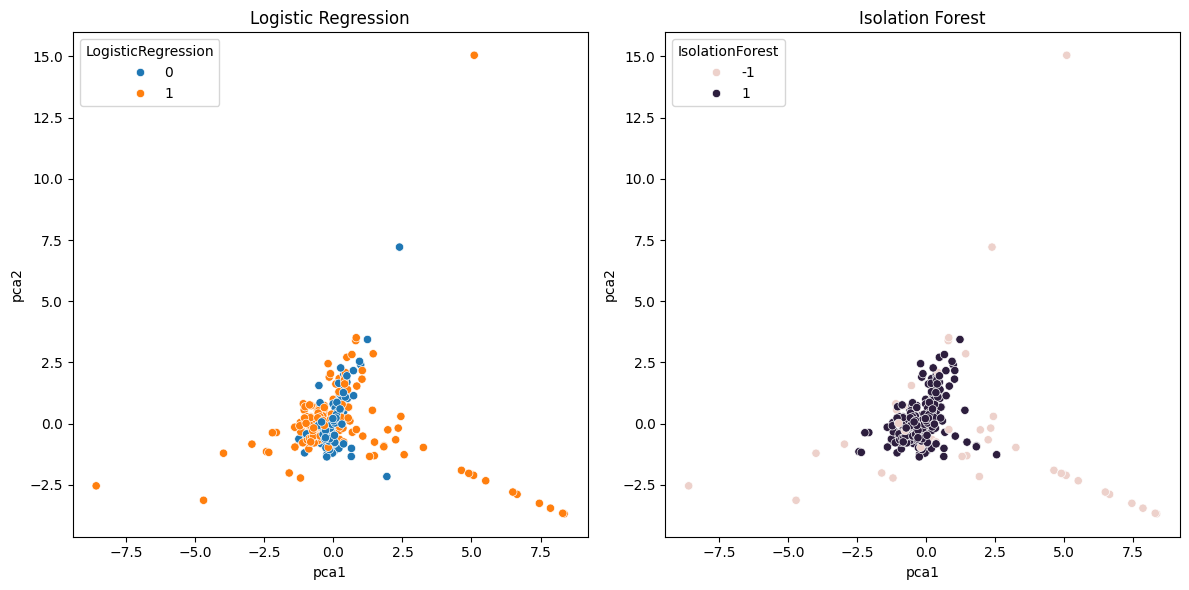

In [108]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

sns.scatterplot(data=results_df, x='pca1', y='pca2', hue='LogisticRegression', ax=axes[0])
axes[0].set_title('Logistic Regression')

sns.scatterplot(data=results_df, x='pca1', y='pca2', hue='IsolationForest', ax=axes[1])
axes[1].set_title('Isolation Forest')

plt.tight_layout()
plt.show()

In [ ]:
# 4.3 데이터 분석가 관점에서 3.에서 만든 모델과 4.에서 만든 모델을 설명하시오.
'''
3은 분류 모델이며, 4는 이상 감지 모델이다.

분류 모델은 데이터의 레이블을 예측하는 모델이며, 이상 감지 모델은 데이터의 이상을 탐지하는 모델이다.

하나의 case가 사기인지 아닌지 예측하는 것은 분류 모델이 적합해 보인다.
다만, 사기는 다양한 방식으로 존재할 수 있고 계속해서 변화한다. 그런 측면에서 이상감지 모델은 미래의 이상을 탐지하는데 더욱 적합해 보인다.
'''

##  2. 통계분석 (50점) 

In [ ]:
# 1. * 2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개,
# 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. 
# (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [110]:
'''
연평균 상승률의 경우에는 산술평균 대신 기하평균을 사용해야 한다.
'''
V_i = 100000
V_f = 250000
n = 2

cagr = (V_f / V_i) ** (1 / n) - 1
cagr_percent = round(cagr * 100, 2)
print(f"연평균 상승률: {cagr_percent}%")

연평균 상승률: 58.11%


In [ ]:
# 2. 12건의 광고시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?
# * 단, 정규분포를 따른다고 가정한다. 

In [ ]:
import numpy as np
from scipy import stats

n = 12
dof = n - 1

mean = 15.5
var = 3.2

alpha = 0.1

print('신뢰구간:', stats.t.interval(confidence=1 - alpha, loc=mean, scale=np.sqrt(var), df=dof))

신뢰구간: (12.287423572494966, 18.71257642750503)


In [113]:
# 3. 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오.
# (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)
# * a = 0.1
import pandas as pd
raw_df = pd.read_csv("./../data/27_problem7.csv")

In [114]:
raw_df

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


In [116]:
# 3-1. 귀무가설과 대립가설을 세우시오
H0 = "상류와 하류의 생물 다양성 점수에 차이가 없다."
H1 = "상류와 하류의 생물 다양성 점수에 차이가 있다."

In [ ]:
# 3-2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.
from scipy import stats

alpha = 0.1
statistic, p_value = stats.ttest_rel(raw_df['up'], raw_df['down'])

print(f"검정 통계량: {statistic}, 유의 확률: {p_value}")
if p_value < alpha:
    print(H1)
else:
    print(H0)

검정 통계량: 3.3526056764717995, 유의 확률: 0.028499777234053288
상류와 하류의 생물 다양성 점수에 차이가 있다.


In [121]:
# 4. user_counts를 종속변수로 하는 데이터이다
import pandas as pd

raw_df = pd.read_csv("./../data/27_problem8.csv")
raw_df.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


In [124]:
# 4-1. 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오.
# (반올림하여 소수점 아래 둘째자리까지 표기하시오.)
from sklearn.linear_model import QuantileRegressor

X = raw_df.drop(columns=['user_counts'])
y = raw_df['user_counts']

quantile = 0.5
quantile_regressor = QuantileRegressor(quantile=quantile)
quantile_regressor = QuantileRegressor()
quantile_regressor.fit(X, y)
coefficients = quantile_regressor.coef_
print(coefficients)

[213.48754448   0.           0.        ]


In [125]:
# 4-2. 1의 모델의 회귀계수를 활용하여 
# temperature : 10.5 , wind : 8.2 ,precipitation : 3.5 일때 user_counts를 예측하시오
# (반올림하여 소수점 아래 둘째자리까지 표기하시오.)
quantile_regressor.predict([[10.5, 8.2, 3.5]])

/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileRegressor was fitted with feature names
  warnings.warn(


array([8278.7544484])

In [128]:
# 5. 지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)
import pandas as pd 
df = pd.read_csv("./../data/27_problem9.csv")
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [ ]:
# 5-1. 귀무가설과 대립가설 설정하시오.
H0 = '지하철 호선과 월별, 승객 수 간 상관관계가 없다.'
H1 = '지하철 호선과 월별, 승객 수 간 상관관계가 있다.'


In [148]:
# 5-2. Type III Anova를 사용하여 상관관계가 있는지 검정하시오.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


model = ols('total ~ C(line) * C(month)', data=df).fit()
anova_table = anova_lm(model, typ=3)
anova_table.round(3)

,sum_sq,df,F,PR(>F)
Intercept,3466344.500,1.0,33455.336,0.0
C(line),133663.000,2.0,645.023,0.0
C(month),39424.833,11.0,34.592,0.0
C(line):C(month),96969.083,22.0,42.541,0.0
Residual,3730.000,36.0,NaN,NaN


In [150]:
# line
if anova_table.loc['C(line)', 'PR(>F)'] < 0.05:
    print('지하철 호선과 승객 수 간 상관관계가 있다.')
else:
    print('지하철 호선과 승객 수 간 상관관계가 없다.')
    
    
# month
if anova_table.loc['C(month)', 'PR(>F)'] < 0.05:
    print('월별, 승객 수 간 상관관계가 있다.')
else:
    print('월별, 승객 수 간 상관관계가 없다.')
    
    
# line * month
if anova_table.loc['C(line):C(month)', 'PR(>F)'] < 0.05:
    print('지하철 호선과 월별, 승객 수 간 상관관계가 있다.')
else:
    print('지하철 호선과 월별, 승객 수 간 상관관계가 없다.')

지하철 호선과 승객 수 간 상관관계가 있다.
월별, 승객 수 간 상관관계가 있다.
지하철 호선과 월별, 승객 수 간 상관관계가 있다.


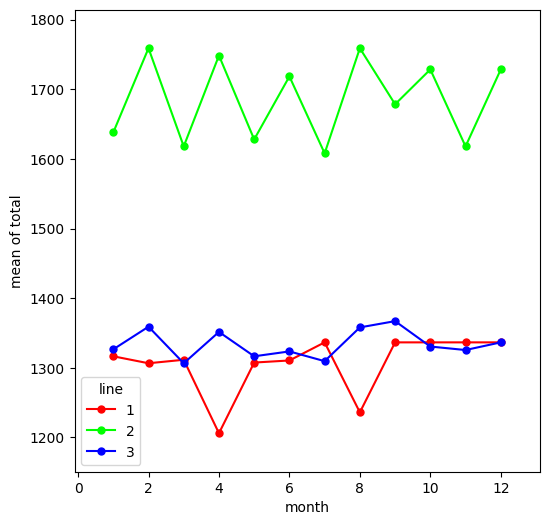

In [151]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

## Series로 변경 
total = df["total"]
line = df["line"]
month = df["month"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(month,line, total,ms=10, ax=ax)